# ML_NLP_Final Project : Abstract Distinguisher 

# POUYA AHADI 400123014 pa@ieee.org 

In [102]:
 #dataset
!gdown --id "1b9H75_LHxxuxlAKvN_VKxWd8SxMujlQo"


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b9H75_LHxxuxlAKvN_VKxWd8SxMujlQo
To: /content/Dataset.csv
100% 7.99M/7.99M [00:00<00:00, 167MB/s]


In [103]:
# pngs 
!gdown --id "1cSh91xvyX9OuHB0msYa6ZIOkBpxjq7bh"
!gdown --id "1SzorvMNqont-h4N8OorETvTGWVydQ1cn"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cSh91xvyX9OuHB0msYa6ZIOkBpxjq7bh
To: /content/like.png
100% 13.6k/13.6k [00:00<00:00, 20.6MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1SzorvMNqont-h4N8OorETvTGWVydQ1cn
To: /content/logotwitter.png
100% 45.0k/45.0k [00:00<00:00, 63.4MB/s]


# First Phase: Collecting raw data

In [104]:
import os
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import regex as re

In [105]:
#df_add = f'//Users//pouyaahadi//Desktop//فایل های ارشد//ML - AUT//NLP//Final_Dataset//Final_English_Dataset.csv'

In [106]:
os.listdir()

['.config', 'Dataset.csv', 'logotwitter.png', 'like.png', 'sample_data']

In [107]:
df = pd.read_csv('Dataset.csv', encoding="latin1")

In [108]:
#df.head()
df

,text,Relevant
0,Twitter's shares fell by more than 25pc in Oct...,1
1,A company with no revenues and barely any staf...,1
2,"YouTube has been around forever, in digital te...",1
3,The New York offices of stockbrokers JP Morgan...,1
4,Facebook executives have been cautioning inves...,1
...,...,...
2218,Many concepts have been proposed for meta lear...,0
2219,Many online communities present user-contribut...,0
2220,Logistic-normal topic models can effectively d...,0
2221,Principal geodesic analysis (PGA) is a general...,0


In [109]:
df['text']

0       Twitter's shares fell by more than 25pc in Oct...
1       A company with no revenues and barely any staf...
2       YouTube has been around forever, in digital te...
3       The New York offices of stockbrokers JP Morgan...
4       Facebook executives have been cautioning inves...
                              ...                        
2218    Many concepts have been proposed for meta lear...
2219    Many online communities present user-contribut...
2220    Logistic-normal topic models can effectively d...
2221    Principal geodesic analysis (PGA) is a general...
2222    We formulate the problem of optimizing the sam...
Name: text, Length: 2223, dtype: object

In [110]:
df['Relevant']

0       1
1       1
2       1
3       1
4       1
       ..
2218    0
2219    0
2220    0
2221    0
2222    0
Name: Relevant, Length: 2223, dtype: int64

In [111]:
a =[]
for i in range(len(df.Relevant)):
    
    if df.Relevant[i] == 0:
           a.append(i)
            
#print(a)

b =[]
for i in range(len(df.Relevant)):
    
    if df.Relevant[i] == 1:
           b.append(i)

In [112]:
print('Total number of Data = ', len(df))

print('Total number of Social media relevancy = ', len(b))

print('Total number of Non-social media relevancy = ', len(a))

print('Total number of nulls in Relevant = ', len(df['Relevant'])-(len(b)+len(a)))


Total number of Data =  2223
Total number of Social media relevancy =  1482
Total number of Non-social media relevancy =  741
Total number of nulls in Relevant =  0


In [113]:
df.isnull().sum()

text        0
Relevant    0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2223 non-null   object
 1   Relevant  2223 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [115]:
dfn = df[df['text'].notnull()]

In [116]:
dfn

,text,Relevant
0,Twitter's shares fell by more than 25pc in Oct...,1
1,A company with no revenues and barely any staf...,1
2,"YouTube has been around forever, in digital te...",1
3,The New York offices of stockbrokers JP Morgan...,1
4,Facebook executives have been cautioning inves...,1
...,...,...
2218,Many concepts have been proposed for meta lear...,0
2219,Many online communities present user-contribut...,0
2220,Logistic-normal topic models can effectively d...,0
2221,Principal geodesic analysis (PGA) is a general...,0


In [117]:
dfn.text.sample(10,random_state=1)

1502    FULL TEXT\n\nJust two weeks after admitting it...
808     Three people were injured by gunfire, one of t...
1262    ABSTRACT\n\nDan Gallagher Heard on the Street ...
1498    Google's decision-making process over which Yo...
111     ABSTRACT\n\nWhile its peers rush toward public...
1250    Facebook on Tuesday for the first time release...
918     Twitter may be about to end its three-month se...
1579    Click to view full-text\n\nhttps://www.nbcnews...
1938    "There's good creepy and there's bad creepy. A...
415     A NEW Facebook dating service has been put on ...
Name: text, dtype: object

In [118]:
text_dfn = dfn['text']
text_dfn = text_dfn.to_frame()
text_dfn.sample(10,random_state=1)

,text
1502,FULL TEXT\n\nJust two weeks after admitting it...
808,"Three people were injured by gunfire, one of t..."
1262,ABSTRACT\n\nDan Gallagher Heard on the Street ...
1498,Google's decision-making process over which Yo...
111,ABSTRACT\n\nWhile its peers rush toward public...
1250,Facebook on Tuesday for the first time release...
918,Twitter may be about to end its three-month se...
1579,Click to view full-text\n\nhttps://www.nbcnews...
1938,"""There's good creepy and there's bad creepy. A..."
415,A NEW Facebook dating service has been put on ...


In [119]:
!pip3 install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import nltk
from nltk.tokenize import word_tokenize
import contractions

In [121]:
text_dfn['text'] = text_dfn['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
text_dfn.sample(10,random_state=1)

,text
1502,"[FULL, TEXT, Just, two, weeks, after, admittin..."
808,"[Three, people, were, injured, by, gunfire,, o..."
1262,"[ABSTRACT, Dan, Gallagher, Heard, on, the, Str..."
1498,"[Google's, decision-making, process, over, whi..."
111,"[ABSTRACT, While, its, peers, rush, toward, pu..."
1250,"[Facebook, on, Tuesday, for, the, first, time,..."
918,"[Twitter, may, be, about, to, end, its, three-..."
1579,"[Click, to, view, full-text, https://www.nbcne..."
1938,"[""There is, good, creepy, and, there is, bad, ..."
415,"[A, NEW, Facebook, dating, service, has, been,..."


In [122]:
text_dfn['text'] = [' '.join(map(str,l)) for l in text_dfn['text']]
text_dfn.sample(10,random_state=1)

,text
1502,FULL TEXT Just two weeks after admitting it st...
808,"Three people were injured by gunfire, one of t..."
1262,ABSTRACT Dan Gallagher Heard on the Street art...
1498,Google's decision-making process over which Yo...
111,ABSTRACT While its peers rush toward public of...
1250,Facebook on Tuesday for the first time release...
918,Twitter may be about to end its three-month se...
1579,Click to view full-text https://www.nbcnews.co...
1938,"""There is good creepy and there is bad creepy...."
415,A NEW Facebook dating service has been put on ...


In [123]:
import regex as re

In [124]:
text_dfn['text'] = text_dfn['text'].str.lower()
text_dfn.sample(10,random_state=1)

,text
1502,full text just two weeks after admitting it st...
808,"three people were injured by gunfire, one of t..."
1262,abstract dan gallagher heard on the street art...
1498,google's decision-making process over which yo...
111,abstract while its peers rush toward public of...
1250,facebook on tuesday for the first time release...
918,twitter may be about to end its three-month se...
1579,click to view full-text https://www.nbcnews.co...
1938,"""there is good creepy and there is bad creepy...."
415,a new facebook dating service has been put on ...


In [125]:
text_dfn['text'] = text_dfn['text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '',x))
text_dfn.sample(10,random_state=1)

,text
1502,full text just two weeks after admitting it st...
808,three people were injured by gunfire one of th...
1262,abstract dan gallagher heard on the street art...
1498,google's decisionmaking process over which you...
111,abstract while its peers rush toward public of...
1250,facebook on tuesday for the first time release...
918,twitter may be about to end its threemonth sea...
1579,click to view fulltext httpswwwnbcnewscomtecht...
1938,there is good creepy and there is bad creepy a...
415,a new facebook dating service has been put on ...


In [126]:
text_dfn['text'][0]

"twitter's shares fell by more than 25pc in october from highs of 55 the company has failed to dispel the age old concerns about technology float valuations and here are my five reasons why i would not invest in the 140 character microblogging site 1 no profits there are still no profits here and without a solid track record of posttax profits and without that investors' are buying on the belief of what the future will bring the dotcom boom of a decade ago was an example of extreme investor confidence when some companies' valuations were based on the number of clicks their websites got and had little or no relation to their profits or revenue twitter's results showed revenue in the third quarter more than doubling to 3613m when compared to the same period last year but losses almost tripled to 1755m at the same time that brings losses in the first nine months of the year to 4525m on revenue of 9239m one of the main reasons for those losses is that as twitter expanded it paid staff and 

In [127]:
df['text'][0]

"Twitter's shares fell by more than 25pc in October from highs of $55. The company has failed to dispel the age old concerns about technology float valuations.\n\nAnd here are my five reasons why I wouldn't invest in the 140 character micro-blogging site.\n\n1 No profits\n\nThere are still no profits here and without a solid track record of post-tax profits and without that investors' are buying on the belief of what the future will bring. The dotcom boom of a decade ago was an example of extreme investor confidence when some companies' valuations were based on the number of clicks their websites got, and had little or no relation to their profits or revenue.\n\nTwitter's results showed revenue in the third quarter more than doubling to $361.3m when compared to the same period last year, but losses almost tripled to $175.5m at the same time. That brings losses in the first nine months of the year to $452.5m, on revenue of $923.9m.\n\nOne of the main reasons for those losses is that as 

In [128]:
!pip3 install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
text_dfn['tokenized_text'] = text_dfn['text'].apply(word_tokenize)
text_dfn.sample(10,random_state=1)

,text,tokenized_text
1502,full text just two weeks after admitting it st...,"[full, text, just, two, weeks, after, admittin..."
808,three people were injured by gunfire one of th...,"[three, people, were, injured, by, gunfire, on..."
1262,abstract dan gallagher heard on the street art...,"[abstract, dan, gallagher, heard, on, the, str..."
1498,google's decisionmaking process over which you...,"[google, 's, decisionmaking, process, over, wh..."
111,abstract while its peers rush toward public of...,"[abstract, while, its, peers, rush, toward, pu..."
1250,facebook on tuesday for the first time release...,"[facebook, on, tuesday, for, the, first, time,..."
918,twitter may be about to end its threemonth sea...,"[twitter, may, be, about, to, end, its, threem..."
1579,click to view fulltext httpswwwnbcnewscomtecht...,"[click, to, view, fulltext, httpswwwnbcnewscom..."
1938,there is good creepy and there is bad creepy a...,"[there, is, good, creepy, and, there, is, bad,..."
415,a new facebook dating service has been put on ...,"[a, new, facebook, dating, service, has, been,..."


In [131]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
from collections import defaultdict
def plot_stop_words_frequency(input):
    
    stop = set(stopwords.words('english'))
    new = input.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    dic = defaultdict(int) 
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
    x,y = zip(*top)
    plt.figure(figsize = (10,10))
    plt.bar(x,y)

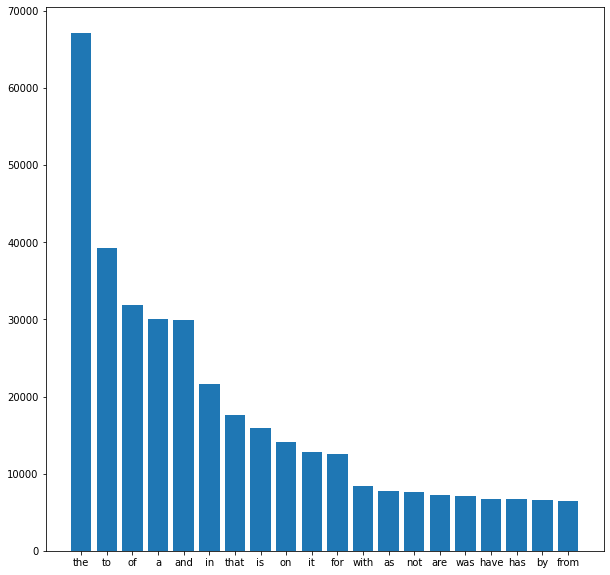

In [133]:
plot_stop_words_frequency(text_dfn['text'])

In [134]:
text_dfn

,text,tokenized_text
0,twitter's shares fell by more than 25pc in oct...,"[twitter, 's, shares, fell, by, more, than, 25..."
1,a company with no revenues and barely any staf...,"[a, company, with, no, revenues, and, barely, ..."
2,youtube has been around forever in digital ter...,"[youtube, has, been, around, forever, in, digi..."
3,the new york offices of stockbrokers jp morgan...,"[the, new, york, offices, of, stockbrokers, jp..."
4,facebook executives have been cautioning inves...,"[facebook, executives, have, been, cautioning,..."
...,...,...
2218,many concepts have been proposed for meta lear...,"[many, concepts, have, been, proposed, for, me..."
2219,many online communities present usercontribute...,"[many, online, communities, present, usercontr..."
2220,logisticnormal topic models can effectively di...,"[logisticnormal, topic, models, can, effective..."
2221,principal geodesic analysis pga is a generaliz...,"[principal, geodesic, analysis, pga, is, a, ge..."


In [135]:
text_dfn.isna().sum()

text              0
tokenized_text    0
dtype: int64

In [136]:
text_dfn['text']

0       twitter's shares fell by more than 25pc in oct...
1       a company with no revenues and barely any staf...
2       youtube has been around forever in digital ter...
3       the new york offices of stockbrokers jp morgan...
4       facebook executives have been cautioning inves...
                              ...                        
2218    many concepts have been proposed for meta lear...
2219    many online communities present usercontribute...
2220    logisticnormal topic models can effectively di...
2221    principal geodesic analysis pga is a generaliz...
2222    we formulate the problem of optimizing the sam...
Name: text, Length: 2223, dtype: object

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [138]:
tex = " ".join(cat for cat in text_dfn['text'])

In [139]:
from PIL import Image
custom_mask = np.array(Image.open("logotwitter.png"))


In [140]:
custom_mask = np.array(Image.open("logotwitter.png"))

word_cloud = WordCloud(collocations = True,width = 2000, height = 1000,
                       background_color = 'white',max_words=80, mask = custom_mask).generate(tex)

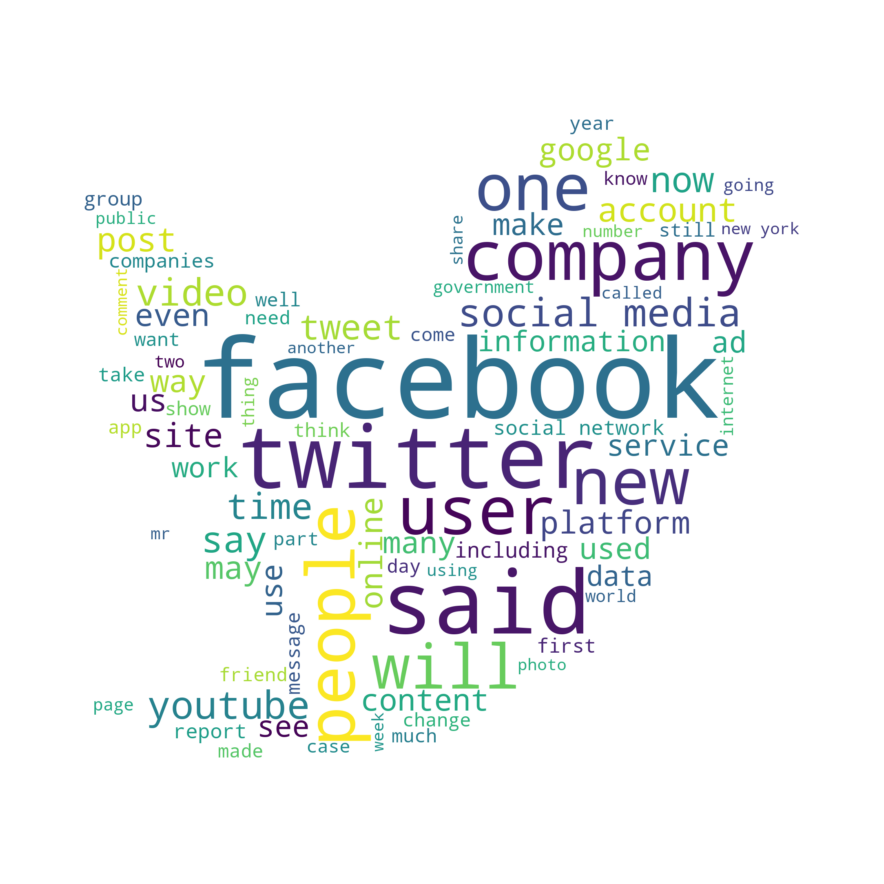

In [141]:
plt.figure(figsize=(16,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [142]:
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
text_dfn['tokenized_text'] = text_dfn['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
text_dfn['tokenized_text_join'] = [' '.join(map(str,l)) for l in text_dfn['tokenized_text']]

In [144]:
text_dfn['tokenized_text_join']

0       twitter 's shares fell 25pc october highs 55 c...
1       company revenues barely staff gets acquired bi...
2       youtube around forever digital terms least for...
3       new york offices stockbrokers jp morgan flew f...
4       facebook executives cautioning investors socia...
                              ...                        
2218    many concepts proposed meta learning neural ne...
2219    many online communities present usercontribute...
2220    logisticnormal topic models effectively discov...
2221    principal geodesic analysis pga generalization...
2222    formulate problem optimizing sampling natural ...
Name: tokenized_text_join, Length: 2223, dtype: object

In [145]:
text = " ".join(cat for cat in text_dfn['tokenized_text_join'])

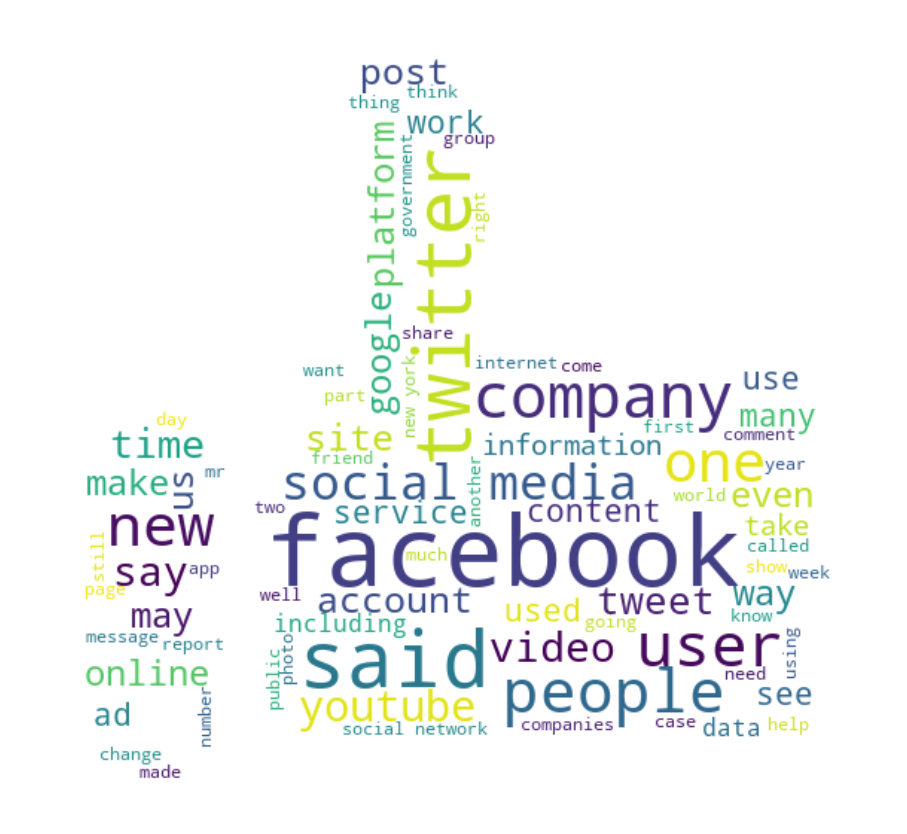

In [146]:
custom_mask = np.array(Image.open("like.png"))

word_cloud = WordCloud(collocations = True,width = 2000, height = 1000,
                       background_color = 'white',max_words=80, mask = custom_mask).generate(text)

plt.figure(figsize=(16,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

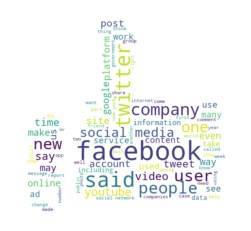

In [147]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [148]:
import seaborn as sns
from collections import Counter

In [149]:
def plot_Non_stop_words_frequency(input):
    
    stop = set(stopwords.words('english'))
    new = input.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x,y=[],[]
    
    for word,count in most[:80]:
        if word not in stop:
            x.append(word)
            y.append(count)
            
    plt.figure(figsize = (20,10))
    sns.barplot(x=y,y=x)
    #plt.bar(x,y)

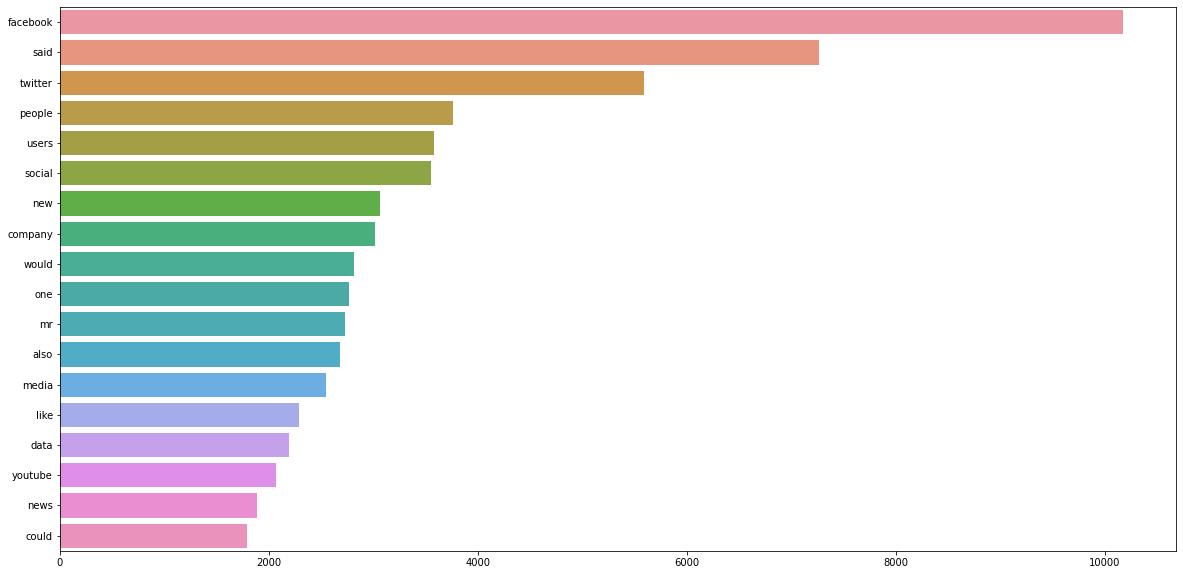

In [150]:
plot_Non_stop_words_frequency(text_dfn['text'])

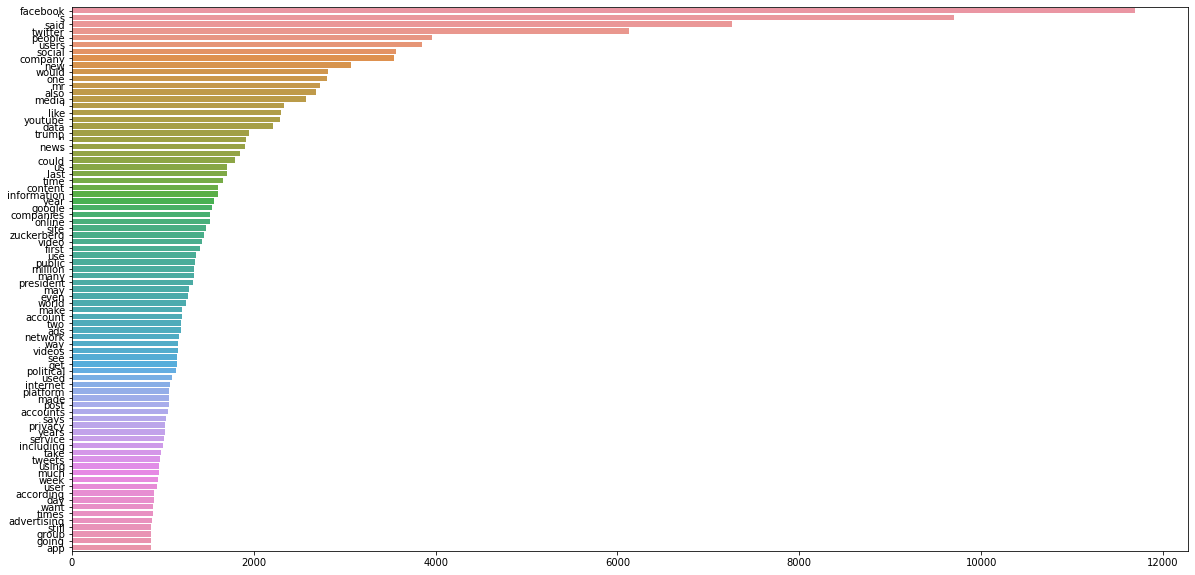

In [151]:
plot_Non_stop_words_frequency(text_dfn['tokenized_text_join'])

# Removing the stop words

In [152]:
text_dfn['tokenized_text'] = text_dfn['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
text_dfn['tokenized_text_join'] = [' '.join(map(str,l)) for l in text_dfn['tokenized_text']]

In [153]:
text_dfn.sample(10,random_state=1)

,text,tokenized_text,tokenized_text_join
1502,full text just two weeks after admitting it st...,"[full, text, two, weeks, admitting, stored, hu...",full text two weeks admitting stored hundreds ...
808,three people were injured by gunfire one of th...,"[three, people, injured, gunfire, one, critica...",three people injured gunfire one critically sh...
1262,abstract dan gallagher heard on the street art...,"[abstract, dan, gallagher, heard, street, arti...",abstract dan gallagher heard street article wa...
1498,google's decisionmaking process over which you...,"[google, 's, decisionmaking, process, youtube,...",google 's decisionmaking process youtube video...
111,abstract while its peers rush toward public of...,"[abstract, peers, rush, toward, public, offeri...",abstract peers rush toward public offerings so...
1250,facebook on tuesday for the first time release...,"[facebook, tuesday, first, time, released, rep...",facebook tuesday first time released report sh...
918,twitter may be about to end its threemonth sea...,"[twitter, may, end, threemonth, search, new, c...",twitter may end threemonth search new ceo star...
1579,click to view fulltext httpswwwnbcnewscomtecht...,"[click, view, fulltext, httpswwwnbcnewscomtech...",click view fulltext httpswwwnbcnewscomtechtech...
1938,there is good creepy and there is bad creepy a...,"[good, creepy, bad, creepy, today, 's, creepy,...",good creepy bad creepy today 's creepy tomorro...
415,a new facebook dating service has been put on ...,"[new, facebook, dating, service, put, hold, fo...",new facebook dating service put hold following...


In [154]:
text_dfn['tokenized_text_join'][0]

"twitter 's shares fell 25pc october highs 55 company failed dispel age old concerns technology float valuations five reasons would invest 140 character microblogging site 1 profits still profits without solid track record posttax profits without investors ' buying belief future bring dotcom boom decade ago example extreme investor confidence companies ' valuations based number clicks websites got little relation profits revenue twitter 's results showed revenue third quarter doubling 3613m compared period last year losses almost tripled 1755m time brings losses first nine months year 4525m revenue 9239m one main reasons losses twitter expanded paid staff customers promise shares value shares soared post flotation impacting company 's profits paid twitter said cost stock options year ahead could reach 640m excludes future acquisitions funded issuing new shares issuing stock options weigh twitter 's reported profits next three years 2 slowing growth investors buying twitter shares expec

In [155]:
ylabels =[]
xlabels = []
khali = []

In [156]:
ylabels = df['Relevant']

In [157]:
ylabels

0       1
1       1
2       1
3       1
4       1
       ..
2218    0
2219    0
2220    0
2221    0
2222    0
Name: Relevant, Length: 2223, dtype: int64

In [158]:
text_dfn

,text,tokenized_text,tokenized_text_join
0,twitter's shares fell by more than 25pc in oct...,"[twitter, 's, shares, fell, 25pc, october, hig...",twitter 's shares fell 25pc october highs 55 c...
1,a company with no revenues and barely any staf...,"[company, revenues, barely, staff, gets, acqui...",company revenues barely staff gets acquired bi...
2,youtube has been around forever in digital ter...,"[youtube, around, forever, digital, terms, lea...",youtube around forever digital terms least for...
3,the new york offices of stockbrokers jp morgan...,"[new, york, offices, stockbrokers, jp, morgan,...",new york offices stockbrokers jp morgan flew f...
4,facebook executives have been cautioning inves...,"[facebook, executives, cautioning, investors, ...",facebook executives cautioning investors socia...
...,...,...,...
2218,many concepts have been proposed for meta lear...,"[many, concepts, proposed, meta, learning, neu...",many concepts proposed meta learning neural ne...
2219,many online communities present usercontribute...,"[many, online, communities, present, usercontr...",many online communities present usercontribute...
2220,logisticnormal topic models can effectively di...,"[logisticnormal, topic, models, effectively, d...",logisticnormal topic models effectively discov...
2221,principal geodesic analysis pga is a generaliz...,"[principal, geodesic, analysis, pga, generaliz...",principal geodesic analysis pga generalization...


In [159]:
for i in range(0,len(df)):
    if df['Relevant'][i] == 1:
        pass
    elif df['Relevant'][i] == 0:
        pass
    else:
        khali.append(i)

In [160]:
len(khali)

0

In [161]:
khali

[]

In [162]:
for i in khali:
    ylabels[i] = 0

In [163]:
ylabels

0       1
1       1
2       1
3       1
4       1
       ..
2218    0
2219    0
2220    0
2221    0
2222    0
Name: Relevant, Length: 2223, dtype: int64

In [164]:
ylabels.isnull().sum()

0

In [165]:
text_dfn

,text,tokenized_text,tokenized_text_join
0,twitter's shares fell by more than 25pc in oct...,"[twitter, 's, shares, fell, 25pc, october, hig...",twitter 's shares fell 25pc october highs 55 c...
1,a company with no revenues and barely any staf...,"[company, revenues, barely, staff, gets, acqui...",company revenues barely staff gets acquired bi...
2,youtube has been around forever in digital ter...,"[youtube, around, forever, digital, terms, lea...",youtube around forever digital terms least for...
3,the new york offices of stockbrokers jp morgan...,"[new, york, offices, stockbrokers, jp, morgan,...",new york offices stockbrokers jp morgan flew f...
4,facebook executives have been cautioning inves...,"[facebook, executives, cautioning, investors, ...",facebook executives cautioning investors socia...
...,...,...,...
2218,many concepts have been proposed for meta lear...,"[many, concepts, proposed, meta, learning, neu...",many concepts proposed meta learning neural ne...
2219,many online communities present usercontribute...,"[many, online, communities, present, usercontr...",many online communities present usercontribute...
2220,logisticnormal topic models can effectively di...,"[logisticnormal, topic, models, effectively, d...",logisticnormal topic models effectively discov...
2221,principal geodesic analysis pga is a generaliz...,"[principal, geodesic, analysis, pga, generaliz...",principal geodesic analysis pga generalization...


In [166]:
xlabels = text_dfn['tokenized_text_join'].copy()

In [167]:
xlabels

0       twitter 's shares fell 25pc october highs 55 c...
1       company revenues barely staff gets acquired bi...
2       youtube around forever digital terms least for...
3       new york offices stockbrokers jp morgan flew f...
4       facebook executives cautioning investors socia...
                              ...                        
2218    many concepts proposed meta learning neural ne...
2219    many online communities present usercontribute...
2220    logisticnormal topic models effectively discov...
2221    principal geodesic analysis pga generalization...
2222    formulate problem optimizing sampling natural ...
Name: tokenized_text_join, Length: 2223, dtype: object

In [168]:
xlabels.isnull().sum()

0

In [169]:
print(len(xlabels))
print(len(ylabels))

2223
2223


In [170]:
print(xlabels.shape)
print(ylabels.shape)

(2223,)
(2223,)


In [171]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xlabels, ylabels, test_size = 0.15, random_state = 1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 1)

In [173]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1889,)
(334,)
(1889,)
(334,)


In [174]:
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

In [175]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [176]:
feature_names = vectorizer.get_feature_names_out()

In [177]:
vectorizer.vocabulary_

{'parents': 28053,
 'able': 2767,
 'handpick': 18039,
 'channels': 8272,
 'topics': 38568,
 'children': 8494,
 'view': 40755,
 'app': 4391,
 'criticized': 10728,
 'allowing': 3739,
 'disturbing': 12659,
 'content': 10026,
 'slip': 35028,
 'youtube': 42377,
 'kids': 21760,
 'inadvertently': 19812,
 'recommending': 31315,
 'videos': 40734,
 'said': 33066,
 'wednesday': 41384,
 'would': 42034,
 'introduce': 20619,
 'several': 34161,
 'ways': 41275,
 'limit': 22786,
 'watched': 41229,
 'popular': 29393,
 'beginning': 5857,
 'week': 41391,
 'select': 33811,
 'trusted': 39136,
 'channelsù': 8273,
 'access': 2889,
 'like': 22747,
 'sesame': 34120,
 'workshopù': 41983,
 'learningù': 22401,
 'curated': 10945,
 'people': 28421,
 'partners': 28135,
 'googleowned': 17366,
 'blog': 6439,
 'post': 29486,
 'also': 3800,
 'option': 27348,
 'restrict': 32114,
 'video': 40709,
 'recommendations': 31312,
 'verifiedù': 40611,
 'avoiding': 5236,
 'broader': 7108,
 'sea': 33646,
 'pulls': 30498,
 'main': 23

In [178]:
from sklearn.metrics import accuracy_score

print("LogisticRegression")
print("__________________")
print("                  ")

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test,y_test)))

#accuracy_score(y_test,pred_logreg)

pred_logreg = logreg.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion Matrix:\n{}".format(confusion))

LogisticRegression
__________________
                  
Train set accuracy: 0.929
Test set accuracy: 0.862
Confusion Matrix:
[[ 72  38]
 [  8 216]]


In [179]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000),X_train,y_train,cv=5)
print("Mean cross-Validation accuracy: {:.2f}".format(np.mean(scores)))

param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Mean cross-Validation accuracy: 0.84
Best Cross-validation score: 0.85
Best parameters:  {'C': 10}


In [180]:
print("Multinomial Naive Bayes")
print("__________________")
print("                  ")

nb = MultinomialNB()
nb.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(nb.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(nb.score(X_test,y_test)))

pred_nb = nb.predict(X_test)
confusion = confusion_matrix(y_test, pred_nb)
print("Confusion Matrix:\n{}".format(confusion))

Multinomial Naive Bayes
__________________
                  
Train set accuracy: 0.688
Test set accuracy: 0.680
Confusion Matrix:
[[  3 107]
 [  0 224]]


In [181]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [182]:
print("SVM")
print("__________________")
print("                  ")

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)# Use accuracy_score function to get the accuracy


print("Test set accuracy: ", accuracy_score(predictions_SVM, y_test))

confusion = confusion_matrix(y_test, predictions_SVM)
print("Confusion Matrix:\n{}".format(confusion))

SVM
__________________
                  
Test set accuracy:  0.8682634730538922
Confusion Matrix:
[[ 83  27]
 [ 17 207]]


In [183]:
print("Random Forest")
print("__________________")
print("                  ")

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(rf.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(rf.score(X_test,y_test)))

pred_rf = rf.predict(X_test)
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:\n{}".format(confusion))

Random Forest
__________________
                  
Train set accuracy: 0.998
Test set accuracy: 0.817
Confusion Matrix:
[[ 57  53]
 [  8 216]]


In [184]:
print("Decision Tree")
print("__________________")
print("                  ")


tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test,y_test)))

pred_tree = tree.predict(X_test)
confusion = confusion_matrix(y_test, pred_tree)
print("Confusion Matrix:\n{}".format(confusion))

Decision Tree
__________________
                  
Train set accuracy: 0.998
Test set accuracy: 0.775
Confusion Matrix:
[[ 74  36]
 [ 39 185]]


In [185]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
print("Linear Regression")
print("__________________")
print("                  ")


reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(reg.score(X_train,y_train)))

pred_reg = reg.predict(X_test)
print("Test set accuracy: {:.3f}".format(reg.score(X_test,pred_reg)))

Linear Regression
__________________
                  
Train set accuracy: 0.996
Test set accuracy: 1.000


In [186]:
from sklearn.cluster import KMeans

print("K-means")
print("__________________")
print("                  ")

kmn = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)


#kmn = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)


kmn.fit(X_train,y_train)
print("Train set accuracy: {:.3f}".format(kmn.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(kmn.score(X_test,y_test)))

pred_kmn = kmn.predict(X_test)
confusion = confusion_matrix(y_test, pred_kmn)
print("Confusion Matrix:\n{}".format(confusion))

K-means
__________________
                  
Train set accuracy: -1797.444
Test set accuracy: -315.981
Confusion Matrix:
[[ 11  99]
 [112 112]]


In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

print("KNN")
print("__________________")
print("                  ")


sc = StandardScaler(with_mean=False)
X_trainknn = sc.fit_transform(X_train)
X_testknn = sc.transform(X_test)


knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_trainknn,y_train)
print("Train set accuracy: {:.3f}".format(knn.score(X_trainknn,y_train)))
print("Test set accuracy: {:.3f}".format(knn.score(X_testknn,y_test)))

pred_knn = knn.predict(X_testknn)
confusion = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix:\n{}".format(confusion))

KNN
__________________
                  
Train set accuracy: 0.692
Test set accuracy: 0.683
Confusion Matrix:
[[  4 106]
 [  0 224]]


# Emtiazi 

In [188]:
text_dfn

,text,tokenized_text,tokenized_text_join
0,twitter's shares fell by more than 25pc in oct...,"[twitter, 's, shares, fell, 25pc, october, hig...",twitter 's shares fell 25pc october highs 55 c...
1,a company with no revenues and barely any staf...,"[company, revenues, barely, staff, gets, acqui...",company revenues barely staff gets acquired bi...
2,youtube has been around forever in digital ter...,"[youtube, around, forever, digital, terms, lea...",youtube around forever digital terms least for...
3,the new york offices of stockbrokers jp morgan...,"[new, york, offices, stockbrokers, jp, morgan,...",new york offices stockbrokers jp morgan flew f...
4,facebook executives have been cautioning inves...,"[facebook, executives, cautioning, investors, ...",facebook executives cautioning investors socia...
...,...,...,...
2218,many concepts have been proposed for meta lear...,"[many, concepts, proposed, meta, learning, neu...",many concepts proposed meta learning neural ne...
2219,many online communities present usercontribute...,"[many, online, communities, present, usercontr...",many online communities present usercontribute...
2220,logisticnormal topic models can effectively di...,"[logisticnormal, topic, models, effectively, d...",logisticnormal topic models effectively discov...
2221,principal geodesic analysis pga is a generaliz...,"[principal, geodesic, analysis, pga, generaliz...",principal geodesic analysis pga generalization...


In [189]:
ylabels

0       1
1       1
2       1
3       1
4       1
       ..
2218    0
2219    0
2220    0
2221    0
2222    0
Name: Relevant, Length: 2223, dtype: int64

In [190]:
import pandas as pd
data = pd.concat([text_dfn["tokenized_text_join"], ylabels], axis=1)
data

,tokenized_text_join,Relevant
0,twitter 's shares fell 25pc october highs 55 c...,1
1,company revenues barely staff gets acquired bi...,1
2,youtube around forever digital terms least for...,1
3,new york offices stockbrokers jp morgan flew f...,1
4,facebook executives cautioning investors socia...,1
...,...,...
2218,many concepts proposed meta learning neural ne...,0
2219,many online communities present usercontribute...,0
2220,logisticnormal topic models effectively discov...,0
2221,principal geodesic analysis pga generalization...,0


In [191]:
data["Relevant"].value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Relevant, dtype: float64

In [192]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
import transformers as tfs
from transformers import BertTokenizer, BertModel
import numpy as np
import torch

In [195]:
#tokenizer = tfs.DistilBertTokenizer.from_pretrained('distilbert-base-uncased-distilled-squad')
#tokenizer = tfs.DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
tokenizer = tfs.BertTokenizer.from_pretrained('bert-base-uncased')

In [194]:
#model = tfs.DistilBertModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = tfs.BertModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [196]:
data['tokenized_text_join']

0       twitter 's shares fell 25pc october highs 55 c...
1       company revenues barely staff gets acquired bi...
2       youtube around forever digital terms least for...
3       new york offices stockbrokers jp morgan flew f...
4       facebook executives cautioning investors socia...
                              ...                        
2218    many concepts proposed meta learning neural ne...
2219    many online communities present usercontribute...
2220    logisticnormal topic models effectively discov...
2221    principal geodesic analysis pga generalization...
2222    formulate problem optimizing sampling natural ...
Name: tokenized_text_join, Length: 2223, dtype: object

In [ ]:
#tokenized = data['tokenized_text_join'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True,padding=True))

In [ ]:
#max_length = tokenized.str.len().max()

In [ ]:
#max_length

In [ ]:
#len(tokenized[150])

In [ ]:
#len(tokenized[0])

In [ ]:
#for i in range(0,2223):
#  if len(tokenized[i]) > 64:
#    tokenized[i] = tokenized[i][:64]


In [ ]:
#max_length = tokenized.str.len().max()
#max_length

In [ ]:
#tokenized = tokenizer.encode(tokenized[i], add_special_tokens=True, max_length=10)

In [ ]:
#which =[]
#for i in range(0,2223):
#    if len(tokenized[i]) > 512:
#        which.append(i)
#print(which)

In [ ]:
#new_tokenized = tokenized.drop(which)

In [ ]:
#new_tokenized

In [ ]:
#new_tokenized.str.len().max()

In [ ]:
#max_length = new_tokenized.str.len().max()

In [ ]:
#max_length =512

In [ ]:
#pad_tokenized = np.array([i + [0]*(max_length-len(i)) for i in tokenized.values])

In [ ]:
#pad_tokenized.shape

In [197]:
data


,tokenized_text_join,Relevant
0,twitter 's shares fell 25pc october highs 55 c...,1
1,company revenues barely staff gets acquired bi...,1
2,youtube around forever digital terms least for...,1
3,new york offices stockbrokers jp morgan flew f...,1
4,facebook executives cautioning investors socia...,1
...,...,...
2218,many concepts proposed meta learning neural ne...,0
2219,many online communities present usercontribute...,0
2220,logisticnormal topic models effectively discov...,0
2221,principal geodesic analysis pga generalization...,0


In [198]:
import numpy as np
import torch
def vectorizer(part):
  tokenized = data['tokenized_text_join'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True,padding=True))
  for i in range(0,2223):
    if len(tokenized[i]) > 64:
      tokenized[i] = tokenized[i][:64]
  pad_tokenized = np.array([i + [0]*(64-len(i)) for i in tokenized.values])
  mask = np.where(pad_tokenized != 0, 1, 0)
  mask = torch.tensor(mask)
  pad_tokenized = torch.tensor(pad_tokenized)
  with torch.no_grad():
    vectors = model(pad_tokenized, attention_mask = mask)[0][:,0,:].numpy()
  return vectors

In [199]:
output = []
temp = vectorizer(data["tokenized_text_join"])
output.extend(temp)


Token indices sequence length is longer than the specified maximum sequence length for this model (1205 > 512). Running this sequence through the model will result in indexing errors


In [201]:
len(output)

2223

In [202]:
len(data['Relevant'])

2223

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

output = np.array(output)
xx_train, xx_test, yy_train, yy_test = train_test_split(output, data['Relevant'])

classification = LogisticRegression(max_iter = 1000)
classification.fit(xx_train, yy_train)
preds = classification.predict(xx_test)
accuracy_score(yy_test,preds)

0.7913669064748201